Eren burada grafikler çizip veriyi tanıyacak.

# **Data Merge**

In [172]:
import pandas as pd

# Dosyaları okuyoruz.

df_customers = pd.read_csv('../data/processed/clean_customers.csv')
df_orders = pd.read_csv('../data/processed/clean_orders.csv')
df_details = pd.read_csv('../data/processed/clean_ordersdetails.csv')
df_products = pd.read_csv('../data/processed/clean_products.csv')
df_categories = pd.read_csv('../data/processed/clean_categories.csv')

print('Dosyalar başarıyla okundu.')

Dosyalar başarıyla okundu.


In [173]:
# Detaylar ve ürünler tablolarını birleştiriyoruz.
merge1 = df_details.merge(df_orders, on='OrderID', how='left')

# Birleştirilmiş tabloyu ürünler tablosu ile birleştiriyoruz.
merge2 = merge1.merge(df_products, on='ProductID', how='left')

# Birleştirilmiş tabloyu kategoriler tablosu ile birleştiriyoruz.
merge3 = merge2.merge(df_categories, on='CategoryID', how='left')

# Birleştirilmiş tabloyu müşteriler tablosu ile birleştiriyoruz.   
df_merged = merge3.merge(df_customers, on='CustomerID', how='left')

#Order_Date sütununu datetime formatına çeviriyoruz.
df_merged['Order_Date'] = pd.to_datetime(df_merged['OrderDate'])

df_merged.head()

,OrderID,ProductID,UnitPrice_x,Quantity,Discount,TotalAmount,CustomerID,EmployeeID,OrderDate,RequiredDate,...,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,Phone_Clean,Order_Date
0,10248,11,14.0,12,0.0,168.0,VINET,5.0,1996-07-04,1996-08-01,...,Accounting Manager,59 rue de l'Abbaye,Reims,Bilinmiyor,51100,France,26.47.15.10,26.47.15.11,26.47.15.10,1996-07-04
1,10248,42,9.8,10,0.0,98.0,VINET,5.0,1996-07-04,1996-08-01,...,Accounting Manager,59 rue de l'Abbaye,Reims,Bilinmiyor,51100,France,26.47.15.10,26.47.15.11,26.47.15.10,1996-07-04
2,10248,72,34.8,5,0.0,174.0,VINET,5.0,1996-07-04,1996-08-01,...,Accounting Manager,59 rue de l'Abbaye,Reims,Bilinmiyor,51100,France,26.47.15.10,26.47.15.11,26.47.15.10,1996-07-04
3,10249,14,18.6,9,0.0,167.4,TOMSP,6.0,1996-07-05,1996-08-16,...,Marketing Manager,Luisenstr. 48,Münster,Bilinmiyor,44087,Germany,0251-031259,0251-035695,0251031259,1996-07-05
4,10249,51,42.4,40,0.0,1696.0,TOMSP,6.0,1996-07-05,1996-08-16,...,Marketing Manager,Luisenstr. 48,Münster,Bilinmiyor,44087,Germany,0251-031259,0251-035695,0251031259,1996-07-05


In [174]:
print(f"Toplam Satır Sayısı: {len(df_merged)}")
print(df_merged.isnull().sum()) 

Toplam Satır Sayısı: 2155
OrderID             0
ProductID           0
UnitPrice_x         0
Quantity            0
Discount            0
TotalAmount         0
CustomerID         73
EmployeeID         73
OrderDate          73
RequiredDate       73
ShippedDate        73
ShipVia            73
Freight            73
ShipName           73
ShipAddress        73
ShipCity           73
ShipRegion         73
ShipPostalCode     73
ShipCountry        73
ProductName         0
SupplierID          0
CategoryID          0
QuantityPerUnit     0
UnitPrice_y         0
UnitsInStock        0
UnitsOnOrder        0
ReorderLevel        0
Discontinued        0
CategoryName        0
Description         0
Picture             0
CompanyName        73
ContactName        73
ContactTitle       73
Address            73
City               73
Region             73
PostalCode         73
Country            73
Phone              73
Fax                73
Phone_Clean        73
Order_Date         73
dtype: int64


Burada 73 satırda eksik bilgi tespit edildi. Analiz ve grafikler sırasında problem çıkarmaması adına bu 73 satırı veriden çıkartmayı tercih ediyorum. Toplam verinin %3.4ünü oluşturuyor bu kayıp.

In [175]:
# 1. Adım: Temizliği yapıp yeni bir değişkene atıyoruz (df_master)
# subset=['OrderDate'] -> "Sadece Tarih sütunu boşsa sil" demek.
df_master = df_merged.dropna(subset=['OrderDate'])

#Hatalı verileri bir tabloda toplayalım.
df_errors = df_merged[df_merged['OrderDate'].isnull()]

# 2. Adım: Kontrol
print(f"Eski Satır Sayısı: {len(df_merged)}")
print(f"Yeni Satır Sayısı: {len(df_master)}")
print(f"Kenara ayrılan hatalı kayıt sayısı: {len(df_errors)}")
print("Kalan Boş Tarih Sayısı:", df_master['OrderDate'].isnull().sum())


Eski Satır Sayısı: 2155
Yeni Satır Sayısı: 2082
Kenara ayrılan hatalı kayıt sayısı: 73
Kalan Boş Tarih Sayısı: 0


# **Feature Engineering Ve Analiz**

In [197]:
#Verinin içinden ayları,günleri çekiyoruz.
df_master['Order_Month'] = df_master['Order_Date'].dt.month
df_master['Order_Day'] = df_master['Order_Date'].dt.day

#Kontrol
print(df_master[['Order_Date', 'Order_Month', 'Order_Day']].head())

  Order_Date  Order_Month  Order_Day
0 1996-07-04            7          4
1 1996-07-04            7          4
2 1996-07-04            7          4
3 1996-07-05            7          5
4 1996-07-05            7          5


/var/folders/s0/tf_n875s3ps06ts4061yxy7c0000gn/T/ipykernel_80328/2291193135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master['Order_Month'] = df_master['Order_Date'].dt.month
/var/folders/s0/tf_n875s3ps06ts4061yxy7c0000gn/T/ipykernel_80328/2291193135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master['Order_Day'] = df_master['Order_Date'].dt.day


Resampling

/var/folders/s0/tf_n875s3ps06ts4061yxy7c0000gn/T/ipykernel_80328/2612750031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master['OrderDate'] = pd.to_datetime(df_master['OrderDate'])


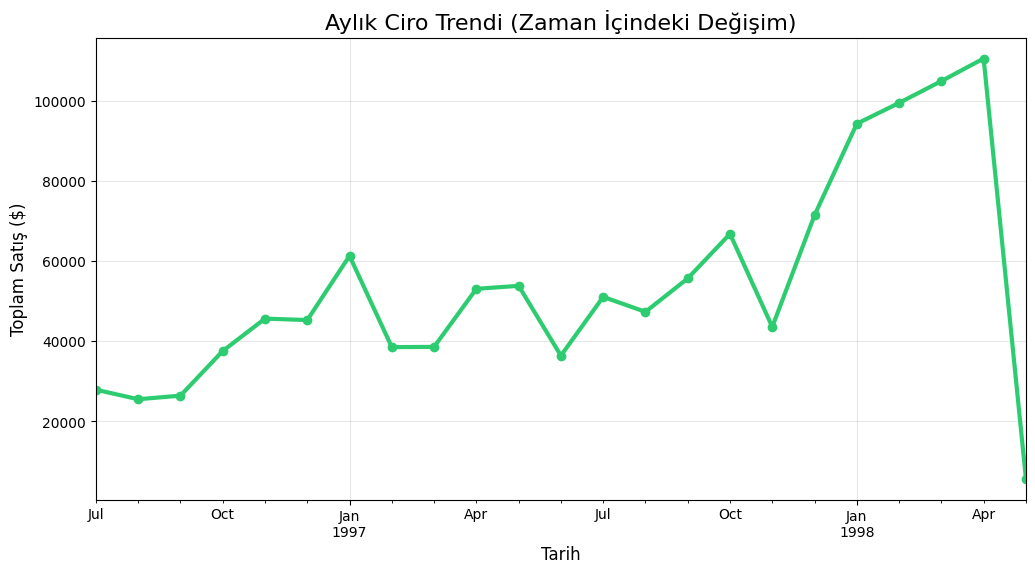

In [198]:
import matplotlib.pyplot as plt

df_master['OrderDate'] = pd.to_datetime(df_master['OrderDate'])

# 1. Önce tarihi 'Index' (Kitap fihristi) yapıyoruz ki Pandas zamanı anlasın.
# (Geçici bir kopya üzerinde çalışıyoruz, orijinal df_master bozulmasın)
df_trend = df_master.set_index('OrderDate')

# 2. 'M' = Month (Ay). Yani veriyi aylık olarak sıkıştır ve topla.
monthly_sales = df_trend['TotalAmount'].resample('ME').sum()

# 3. Grafiği Çiz (Basit bir çizgi grafik)
plt.figure(figsize=(12, 6)) # Tablonun boyutu (Genişlik, Yükseklik)
monthly_sales.plot(color='#2ecc71', linewidth=3, marker='o') # Yeşil renk, kalın çizgi

plt.title('Aylık Ciro Trendi (Zaman İçindeki Değişim)', fontsize=16)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('Toplam Satış ($)', fontsize=12)
plt.grid(True, alpha=0.3) # Arkaya hafif kareli kağıt deseni
plt.show()

In [199]:
print("Verideki En Son Sipariş Tarihi:", df_master['OrderDate'].max())

Verideki En Son Sipariş Tarihi: 1998-05-04 00:00:00


Yukarıda verimizi aylara bölerek, o aylardaki toplam ciroları toplayıp mevimsellik analizi uyguladım. Ve nisan ayındaki (yani verinin son ayındaki) anormal düşüş dikkatimi çekti.
Verilerin hangi günde bittiğini kontrol ettim ve burda gördüğümüz üzere diğer aylarda 30'ar günlük veriler toplanırken, Nisan ayındaki son veri girişi 5 Nisan'da yapılmış. Ve böyle bir yanılgıya sebep olmuş.

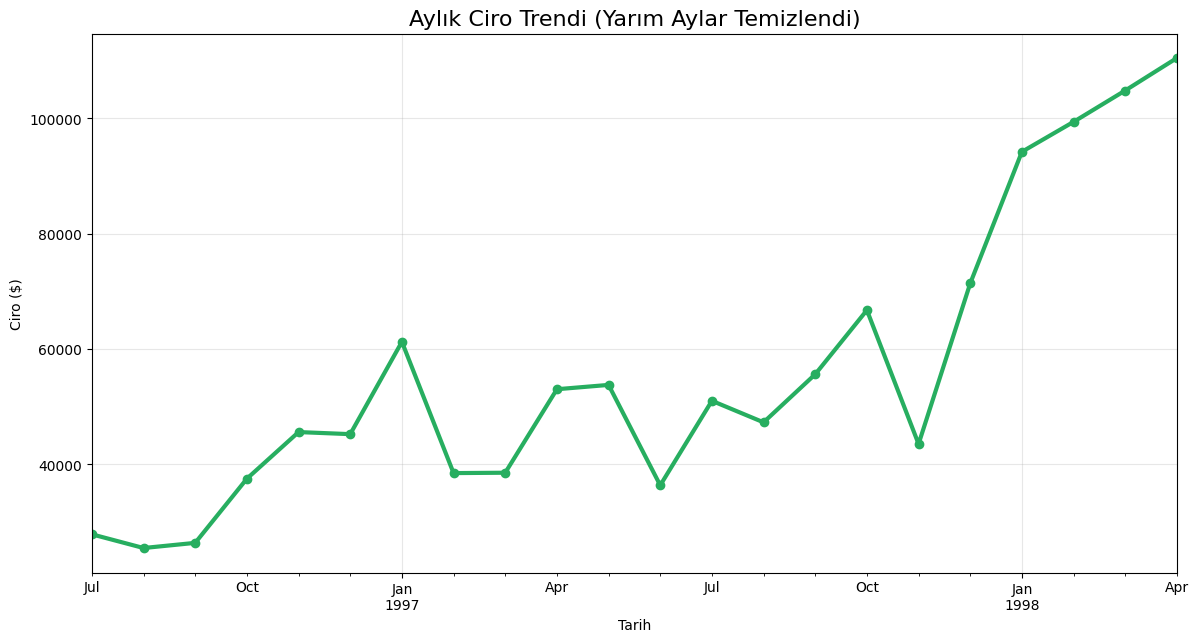

In [200]:
#Yukarıdaki yanılgıyı gidermek ve daha gerçekçi bir trend görmek için son yarım ayı temizleyelim.
monthly_sales_clean = monthly_sales.iloc[:-1] 

# Şimdi temiz grafiği çizelim
plt.figure(figsize=(14, 7))
monthly_sales_clean.plot(color='#27ae60', linewidth=3, marker='o') # Renk değiştirdim (Yeşil)

plt.title('Aylık Ciro Trendi (Yarım Aylar Temizlendi)', fontsize=16)
plt.xlabel('Tarih')
plt.ylabel('Ciro ($)')
plt.grid(True, alpha=0.3)
plt.show()

**Kategori Bazlı Performans İncelemesi (Pareto)** 

     CategoryName  TotalAmount  Share (%)
0       Beverages  262572.4800  21.177666
3  Dairy Products  230951.1650  18.627263
2     Confections  164672.0520  13.281551
5    Meat/Poultry  162132.2095  13.076701
7         Seafood  130070.1375  10.490749
1      Condiments  105047.1850   8.472534
6         Produce   93630.7975   7.551750
4  Grains/Cereals   90779.5825   7.321787


/var/folders/s0/tf_n875s3ps06ts4061yxy7c0000gn/T/ipykernel_80328/1022338263.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_performance, x='TotalAmount', y='CategoryName', palette='viridis')


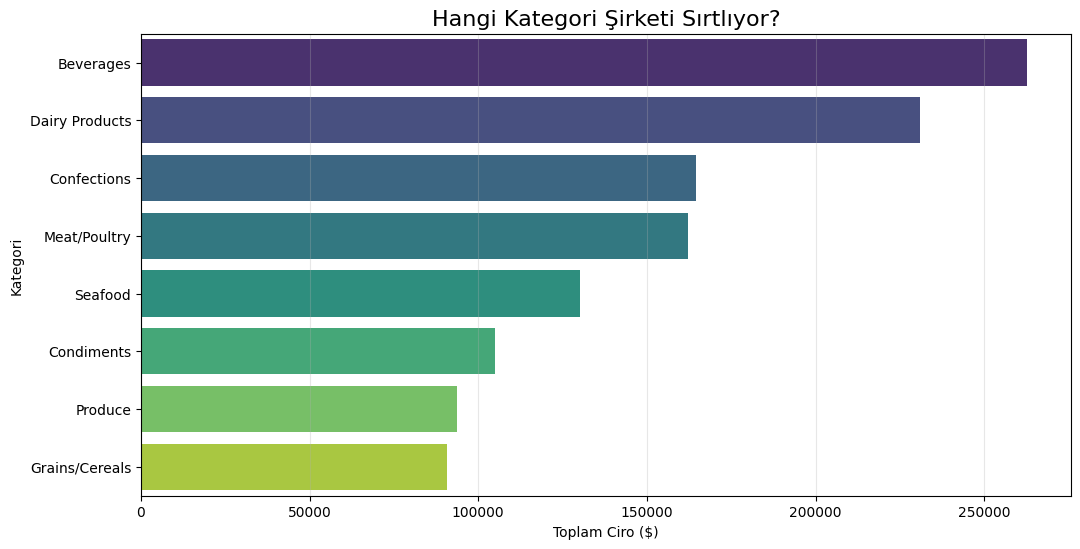

In [201]:
import seaborn as sns

# 1. Kategorilere göre Ciro Toplamı
# reset_index() diyerek tabloyu düzeltiyoruz ki grafik çizebilelim
category_performance = df_master.groupby('CategoryName')['TotalAmount'].sum().reset_index()

# 2. Çoktan aza sırala (Şampiyon en üstte olsun)
category_performance = category_performance.sort_values('TotalAmount', ascending=False)

# 3. Yüzdelik Katkıyı Hesapla (Pareto Mantığı)
# Her kategori toplam cironun % kaçı?
total_revenue = category_performance['TotalAmount'].sum()
category_performance['Share (%)'] = (category_performance['TotalAmount'] / total_revenue) * 100

# Tabloyu görelim
print(category_performance)

# --- Görselleştirme ---
plt.figure(figsize=(12, 6))
sns.barplot(data=category_performance, x='TotalAmount', y='CategoryName', palette='viridis')

plt.title('Hangi Kategori Şirketi Sırtlıyor?', fontsize=16)
plt.xlabel('Toplam Ciro ($)')
plt.ylabel('Kategori')
plt.grid(axis='x', alpha=0.3)
plt.show()

Buradan elde edilen çıktılar:

1- Beverages ve Dairy Products Toplam Cironun %40ını oluşturuyor. Bu tarafta bir sorun yaşanmayacağından emin olunmalı.

2-Produce ve Grains/Cereals kategorileriyse en alt tabakayı oluşturuyor. Burada kritik bir soru olarak:
''Acaba bu ürünlerin kar marjı mı düşük, yoksa müşteriler bizi manav olarak görmüyor mu?'' araştırılabilir.

# **Öneri Motoru İçin Matris Hazırlığı**


In [202]:
# Amaç: Hangi müşteri (Satır), Hangi üründen (Sütun) kaç tane almış?

# 1. Pivot Table
user_item_matrix = df_master.pivot_table(
    index='CustomerID',      # Satırlar: Müşteriler
    columns='ProductName',   # Sütunlar: Ürünler (İstersen ProductID de yapabilirsin ama isimler daha okunaklı)
    values='Quantity',       # Değerler: Kaç tane aldığı
    aggfunc='sum',           # Aynı ürünü birden fazla kez aldıysa topla
    fill_value=0             # Almadığı ürünlere 0 yaz (NaN kalmasın)
)

# 2. Matrisi Kontrol Et 
print("Matris Boyutu:", user_item_matrix.shape) # (Müşteri Sayısı x Ürün Sayısı) olmalı
user_item_matrix.head(10)

#user_item_matrix.to_csv('../data/processed/user_item_matrix.csv')
#print("'user_item_matrix.csv' de oluşturuldu.")

Matris Boyutu: (89, 77)


ProductName,Alice Mutton,Aniseed Syrup,Boston Crab Meat,Camembert Pierrot,Carnarvon Tigers,Chai,Chang,Chartreuse verte,Chef Anton's Cajun Seasoning,Chef Anton's Gumbo Mix,...,Teatime Chocolate Biscuits,Thüringer Rostbratwurst,Tofu,Tourtière,Tunnbröd,Uncle Bob's Organic Dried Pears,Valkoinen suklaa,Vegie-spread,Wimmers gute Semmelknödel,Zaanse koeken
CustomerID,,,,,,,,,,,,,,,,,,,,,
ALFKI,0,6,0,0,0,0,0,21,0,0,...,0,0,0,0,0,0,0,20,0,0
ANATR,0,0,0,10,0,0,0,0,0,0,...,7,0,3,0,0,0,0,0,0,0
ANTON,18,0,10,0,0,0,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AROUT,0,0,0,15,0,0,15,0,0,0,...,0,0,0,0,0,0,39,0,0,25
BERGS,10,30,75,35,0,35,21,26,12,0,...,25,10,16,36,0,0,0,8,0,61
BLAUS,0,0,0,0,10,0,0,5,0,0,...,0,0,0,20,0,0,0,0,0,14
BLONP,30,0,0,0,18,25,0,60,0,0,...,0,35,0,28,0,0,0,0,30,0
BOLID,40,0,0,0,0,0,0,0,24,0,...,0,20,0,0,0,0,0,0,0,0
BONAP,16,0,45,0,50,0,0,21,50,0,...,0,0,0,39,15,58,0,0,28,30


In [203]:
import numpy as np

# 1. Sparsity (Seyreklik) Hesabı
# Matrisin yüzde kaçı 0?
toplam_hucre = user_item_matrix.size # 89 x 77
dolu_hucre = np.count_nonzero(user_item_matrix)
bosluk_orani = (1 - (dolu_hucre / toplam_hucre)) * 100

print(f"Matris Boyutu: {user_item_matrix.shape}")
print(f"Matrisin Doluluk Oranı: %{100 - bosluk_orani:.2f}")
print(f"Matrisin Seyreklik (Sparsity) Oranı: %{bosluk_orani:.2f}")

# YORUM:
if bosluk_orani > 99:
    print("UYARI: Veri çok seyrek! 'Matrix Factorization' veya 'ALS' kullanılması önerilir.")
else:
    print("BİLGİ: Veri yoğunluğu makul. 'User-Based Collaborative Filtering' çalışabilir.")

# 2. Alternatif Versiyon: Binary Matrix (0 ve 1)
user_item_matrix_binary = user_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

user_item_matrix_binary.head(10)
# Bunu da yedekleyelim
#user_item_matrix_binary.to_csv('../data/processed/recommendation_matrix_binary.csv')
#print("'recommendation_matrix_binary.csv' de oluşturuldu.")

Matris Boyutu: (89, 77)
Matrisin Doluluk Oranı: %23.95
Matrisin Seyreklik (Sparsity) Oranı: %76.05
BİLGİ: Veri yoğunluğu makul. 'User-Based Collaborative Filtering' çalışabilir.


/var/folders/s0/tf_n875s3ps06ts4061yxy7c0000gn/T/ipykernel_80328/150547922.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  user_item_matrix_binary = user_item_matrix.applymap(lambda x: 1 if x > 0 else 0)


ProductName,Alice Mutton,Aniseed Syrup,Boston Crab Meat,Camembert Pierrot,Carnarvon Tigers,Chai,Chang,Chartreuse verte,Chef Anton's Cajun Seasoning,Chef Anton's Gumbo Mix,...,Teatime Chocolate Biscuits,Thüringer Rostbratwurst,Tofu,Tourtière,Tunnbröd,Uncle Bob's Organic Dried Pears,Valkoinen suklaa,Vegie-spread,Wimmers gute Semmelknödel,Zaanse koeken
CustomerID,,,,,,,,,,,,,,,,,,,,,
ALFKI,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
ANATR,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
ANTON,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AROUT,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
BERGS,1,1,1,1,0,1,1,1,1,0,...,1,1,1,1,0,0,0,1,0,1
BLAUS,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
BLONP,1,0,0,0,1,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
BOLID,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
BONAP,1,0,1,0,1,0,0,1,1,0,...,0,0,0,1,1,1,0,0,1,1


| Dosya Adı | Açıklama | İçerik Tipi |
| :--- | :--- | :--- |
| **`user_item_matrix.csv`** | Orijinal Etkileşim Matrisi | Satın alınan **Adet (Quantity)** bilgisi içerir. |
| **`recommendation_matrix_binary.csv`** | Binary Matris | Sadece **var/yok (1 veya 0)** bilgisi içerir. Implicit feedback modelleri için uygundur. |

# **RFM Analizi**

In [204]:
# Verideki en son alışveriş tarihini bulalım
son_tarih = df_master['OrderDate'].max()

# Analiz Tarihi (Bugün) olarak, son tarihin üzerine 2 gün ekleyelim.
# Neden? Son gün alışveriş yapanın Recency değeri 0 çıkmasın, en azından 2 gün çıksın diye.
analiz_tarihi = son_tarih + pd.Timedelta(days=2)

print(f"Verideki Son Tarih: {son_tarih}")
print(f"Bizim Analiz Tarihimiz (Bugün kabul ettiğimiz): {analiz_tarihi}")

Verideki Son Tarih: 1998-05-04 00:00:00
Bizim Analiz Tarihimiz (Bugün kabul ettiğimiz): 1998-05-06 00:00:00


In [205]:
# Müşteri bazında gruplama yapıyoruz
rfm = df_master.groupby('CustomerID').agg({
    # RECENCY (Yenilik) Hesabı:
    # (Analiz Tarihi) - (Müşterinin Son Alışveriş Tarihi) = Kaç gün geçmiş?
    'OrderDate': lambda date: (analiz_tarihi - date.max()).days,

    # FREQUENCY (Sıklık) Hesabı:
    # Kaç tane 'EŞSİZ' sipariş numarası (OrderID) var?
    'OrderID': 'nunique',

    # MONETARY (Parasal) Hesabı:
    # Toplam ne kadar para harcadı?
    'TotalAmount': 'sum'
})

# Sütun isimleri karışık gelmesin diye düzeltelim
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Sonucu görelim
rfm.head()



,Recency,Frequency,Monetary
CustomerID,,,
ALFKI,27,6,4273.0000
ANATR,63,4,1402.9500
ANTON,98,7,7023.9775
AROUT,26,13,13390.6500
BERGS,63,18,24927.5775


In [206]:
print(rfm.describe().T) # .T transpoze eder, daha rahat okunur

           count          mean           std    min      25%        50%  \
Recency     89.0     59.977528     85.428197    2.0    19.00    34.0000   
Frequency   89.0      9.089888      5.672182    1.0     5.00     8.0000   
Monetary    89.0  13930.961899  19694.411548  100.8  3172.16  7023.9775   

                  75%         max  
Recency       63.0000     657.000  
Frequency     11.0000      31.000  
Monetary   16585.0125  110277.305  


In [212]:
# 1. Puanlama (1-5 arası not veriyoruz)
# qcut: Veriyi eşit parçalara böler (Çeyreklikler)

# Recency: Düşük olan (yakın tarih) 5 puan alır. O yüzden etiketler [5, 4, 3, 2, 1]
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

# Frequency: Yüksek olan 5 puan alır. (rank(method='first') çakışmaları önlemek için)
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Monetary: Yüksek olan 5 puan alır.
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# 2. Skorları Birleştirip "RFM SKORU" oluşturma
# Örn: 555 (Şampiyon), 111 (Kaybedilmiş)
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) + 
                    rfm['FrequencyScore'].astype(str))

# 3. SEGMENT HARİTASI (En Zevkli Kısım) 🗺️
# Hangi puan ne anlama geliyor?
seg_map = {
    r'[1-2][1-2]': 'Hibernating (Uykudakiler)',
    r'[1-2][3-4]': 'At Risk (Riskli Grup)',
    r'[1-2]5': 'Can\'t Loose (Kaybedemeyiz)',
    r'3[1-2]': 'About to Sleep (Uyumak Üzere)',
    r'33': 'Need Attention (Dikkat İster)',
    r'[3-4][4-5]': 'Loyal Customers (Sadık Müşteriler)',
    r'41': 'Promising (Umut Vaat Eden)',
    r'51': 'New Customers (Yeni Gelenler)',
    r'[4-5][2-3]': 'Potential Loyalists (Potansiyel Sadıklar)',
    r'5[4-5]': 'Champions (Şampiyonlar)'
}

# 4. Haritayı Uygula
rfm['Segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

# Sonucu Görelim: Kim hangi gruba düştü?
print(rfm[['Segment', 'Recency', 'Frequency', 'Monetary']].head(10))


                                              Segment  Recency  Frequency  \
CustomerID                                                                  
ALFKI       Potential Loyalists (Potansiyel Sadıklar)       27          6   
ANATR                       Hibernating (Uykudakiler)       63          4   
ANTON                           At Risk (Riskli Grup)       98          7   
AROUT              Loyal Customers (Sadık Müşteriler)       26         13   
BERGS                      Can't Loose (Kaybedemeyiz)       63         18   
BLAUS                       Hibernating (Uykudakiler)       50          6   
BLONP                           At Risk (Riskli Grup)      114         11   
BOLID                   About to Sleep (Uyumak Üzere)       43          3   
BONAP                      Can't Loose (Kaybedemeyiz)       56         16   
BOTTM                         Champions (Şampiyonlar)       12         13   

              Monetary  
CustomerID              
ALFKI        4273.0000  


In [213]:
# Segmentlere göre ortalamaları alalım
segment_analizi = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_SCORE': 'count' # Bu bize kişi sayısını verir
})

# Sütun adını düzeltelim
segment_analizi.rename(columns={'RFM_SCORE': 'Kişi Sayısı'}, inplace=True)

print(segment_analizi.sort_values('Monetary', ascending=False))

                                              Recency  Frequency  \
Segment                                                            
Champions (Şampiyonlar)                      7.800000  15.800000   
Loyal Customers (Sadık Müşteriler)          23.800000  14.466667   
Can't Loose (Kaybedemeyiz)                  85.800000  14.800000   
At Risk (Riskli Grup)                       85.909091   9.363636   
Need Attention (Dikkat İster)               33.000000   8.200000   
Potential Loyalists (Potansiyel Sadıklar)   16.384615   7.153846   
Hibernating (Uykudakiler)                  141.850000   4.200000   
About to Sleep (Uyumak Üzere)               36.625000   4.000000   
New Customers (Yeni Gelenler)               10.500000   3.500000   

                                               Monetary  Kişi Sayısı  
Segment                                                               
Champions (Şampiyonlar)                    32990.469150           10  
Loyal Customers (Sadık Müşteriler)    

In [214]:
# Segmentlere göre ortalamaları alalım
segment_analizi = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_SCORE': 'count' # Bu bize kişi sayısını verir
})

# Sütun adını düzeltelim
segment_analizi.rename(columns={'RFM_SCORE': 'Kişi Sayısı'}, inplace=True)

print(segment_analizi.sort_values('Monetary', ascending=False))

                                              Recency  Frequency  \
Segment                                                            
Champions (Şampiyonlar)                      7.800000  15.800000   
Loyal Customers (Sadık Müşteriler)          23.800000  14.466667   
Can't Loose (Kaybedemeyiz)                  85.800000  14.800000   
At Risk (Riskli Grup)                       85.909091   9.363636   
Need Attention (Dikkat İster)               33.000000   8.200000   
Potential Loyalists (Potansiyel Sadıklar)   16.384615   7.153846   
Hibernating (Uykudakiler)                  141.850000   4.200000   
About to Sleep (Uyumak Üzere)               36.625000   4.000000   
New Customers (Yeni Gelenler)               10.500000   3.500000   

                                               Monetary  Kişi Sayısı  
Segment                                                               
Champions (Şampiyonlar)                    32990.469150           10  
Loyal Customers (Sadık Müşteriler)    

In [216]:
rfm.reset_index().to_csv('../data/processed/rfm_segments.csv', index=False)